<a href="https://colab.research.google.com/github/juanchess98/Notebooks-Deep-Learning/blob/Regularizadores/Optimizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
import pandas as pd

In [ ]:
# Dataset
# MNIST
mnist_dataset = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
assert x_train.shape == (60000, 28, 28)
assert y_train.shape == (60000,)
assert x_test.shape == (10000, 28, 28)
assert y_test.shape == (10000, )

In [ ]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [ ]:
# Se debe hacer reshape para agregarle el canal 
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
            "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
def conv_network(optimizer, name):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=(28,28,1,)))
  model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))
  model._name = name
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, 
                metrics=["accuracy"])
 
  return model

In [ ]:
optimizer = {}
optimizer['Gradiente_descendende_normal'] = keras.optimizers.SGD(learning_rate=0.001)
optimizer['Gradiente_descendende_momentum'] = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9) # typical value for momentum 0.9
optimizer['AdaGrad'] = keras.optimizers.Adagrad(learning_rate=0.001)
optimizer['RMSProp'] = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
optimizer['Adam'] = keras.optimizers.Adam(learning_rate=0.001)
optimizer['Nadam'] = keras.optimizers.Nadam(learning_rate=0.001)

In [ ]:
models = {}

for key in optimizer.keys():
  models[key] = conv_network(optimizer=optimizer[key], name=key)

In [ ]:
models_history = {}
cb_early_stopping = EarlyStopping(patience=3)
for key in models.keys():
  models_history[key] = models[key].fit(X_train, y_train, epochs=20, batch_size=64, 
                                   validation_split=0.1, callbacks=[cb_early_stopping])

Epoch 1/20
844/844 [==============================] - 34s 4ms/step - loss: 1.9338 - accuracy: 0.3730 - val_loss: 1.4909 - val_accuracy: 0.5807
Epoch 2/20
844/844 [==============================] - 3s 4ms/step - loss: 1.0982 - accuracy: 0.6774 - val_loss: 0.8250 - val_accuracy: 0.7495
Epoch 3/20
844/844 [==============================] - 3s 3ms/step - loss: 0.7467 - accuracy: 0.7566 - val_loss: 0.6666 - val_accuracy: 0.7723
Epoch 4/20
844/844 [==============================] - 3s 3ms/step - loss: 0.6450 - accuracy: 0.7820 - val_loss: 0.6047 - val_accuracy: 0.7937
Epoch 5/20
844/844 [==============================] - 3s 3ms/step - loss: 0.5927 - accuracy: 0.7979 - val_loss: 0.5653 - val_accuracy: 0.8070
Epoch 6/20
844/844 [==============================] - 3s 3ms/step - loss: 0.5585 - accuracy: 0.8081 - val_loss: 0.5393 - val_accuracy: 0.8108
Epoch 7/20
844/844 [==============================] - 3s 3ms/step - loss: 0.5339 - accuracy: 0.8169 - val_loss: 0.5211 - val_accuracy: 0.8153
Epoch

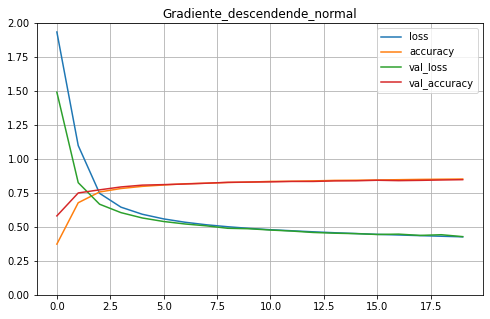

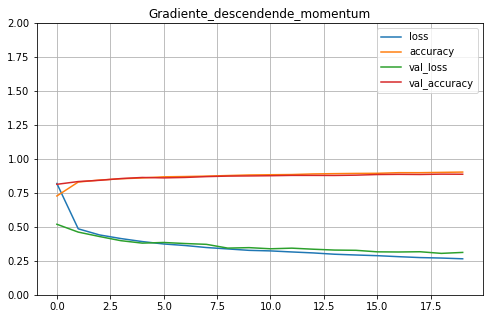

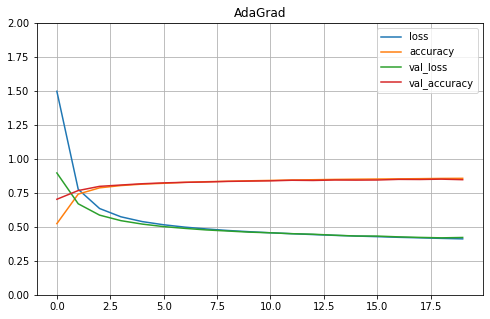

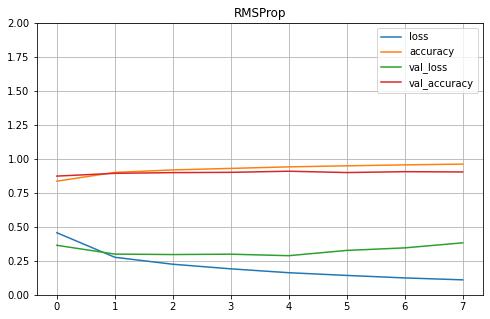

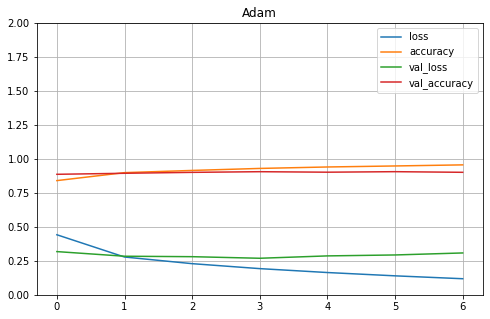

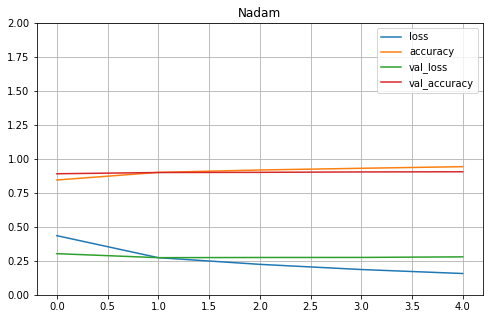

In [ ]:
for key in models_history.keys():
  pd.DataFrame(models_history[key].history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 2)
  plt.title(key)
  plt.show()